In [4]:
import pandas as pd

In [5]:
df = pd.read_excel("default of credit card clients.xls", skiprows=1)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [6]:
len(df)

30000

In [7]:
pd.set_option('display.max_columns', None)
df[df['PAY_3'] == 8]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
8654    8655      30000    1          1         1   47      2      2      8   
18003  18004      70000    1          2         2   33      1      2      8   
29799  29800      20000    1          2         2   33      3      2      8   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
8654       8      8      8       2400       2400       2400       2400   
18003      7      7      6      26181      37611      37026      38922   
29799      7      6      5      14513      22232      21936      21631   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
8654        2400       2400         0         0         0         0         0   
18003      38318      38133     12000         0      2500         0      1000   
29799      21026      20130      8000         0         0         0         0   

       PAY_AMT6  default payment next month  
8654          0                           1  
18003      1500                           0  
29799         0                           1

In [8]:
## change money from NT dollar to US dollar, keep to two decimal places
# the data is recorded at 2005, exchange rate is around 31.5
df_usd = df.copy()  
df_usd[['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']] \
= (df[['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5','PAY_AMT6']] / 31.5).round(2)
df_usd[df_usd['PAY_2'] == 8]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
8843  8844    1269.84    2          3         1   24      1      8      7   

      PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
8843      6      5      4     823.27     812.35     801.08     780.29   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
8843     750.32      720.0       0.0       0.0       0.0       0.0       0.0   

      PAY_AMT6  default payment next month  
8843       0.0                           0

In [9]:
# Summary statistics of the dataset
summary_stats = df_usd.describe()
summary_stats

ID     LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   5316.962199      1.603733      1.853133      1.551867   
std     8660.398374   4118.974262      0.489129      0.790349      0.521970   
min        1.000000    317.460000      1.000000      0.000000      0.000000   
25%     7500.750000   1587.300000      1.000000      1.000000      1.000000   
50%    15000.500000   4444.440000      2.000000      2.000000      2.000000   
75%    22500.250000   7619.050000      2.000000      2.000000      2.000000   
max    30000.000000  31746.030000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6     BILL_AMT1     BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.266200     -0.291100   1626.137489   1561.240442   1492.481072   
std        1.133187      1.149988   2337.646353   2259.484758   2201.567868   
min       -2.000000     -2.000000  -5256.510000  -2215.140000  -4992.510000   
25%       -1.000000     -1.000000    112.972500     94.752500     84.645000   
50%        0.000000      0.000000    710.525000    673.015000    637.730000   
75%        0.000000      0.000000   2129.872500   2031.942500   1909.992500   
max        8.000000      8.000000  30619.400000  31235.900000  52828.220000   

          BILL_AMT4     BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    1373.426930   1279.726970   1234.024125    179.796207    187.973480   
std     2042.312921   1930.068474   1890.606596    525.818395    731.456153   
min    -5396.830000  -2582.030000 -10781.050000      0.000000      0.000000   
25%       73.862500     55.970000     39.870000     31.750000     26.440000   
50%      604.830000    574.745000    541.935000     66.670000     63.780000   
75%     1730.345000   1593.345000   1561.850000    158.920000    158.730000   
max    28304.320000  29434.000000  30529.020000  27731.810000  53468.540000   

           PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6  \
count  30000.000000  30000.000000  30000.000000  30000.000000   
mean     165.894733    153.208885    152.361596    165.571599   
std      558.951078    497.338333    485.025489    564.363945   
min        0.000000      0.000000      0.000000      0.000000   
25%       12.380000      9.400000      8.015000      3.740000   
50%       57.140000     47.620000     47.620000     47.620000   
75%      143.020000    127.407500    127.985000    126.980000   
max    28445.710000  19714.290000  13540.600000  16783.050000   

       default payment next month  
count                30000.000000  
mean                     0.221200  
std                      0.415062  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

In [10]:
# Check for missing values
missing_values = df_usd.isnull().sum()
missing_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

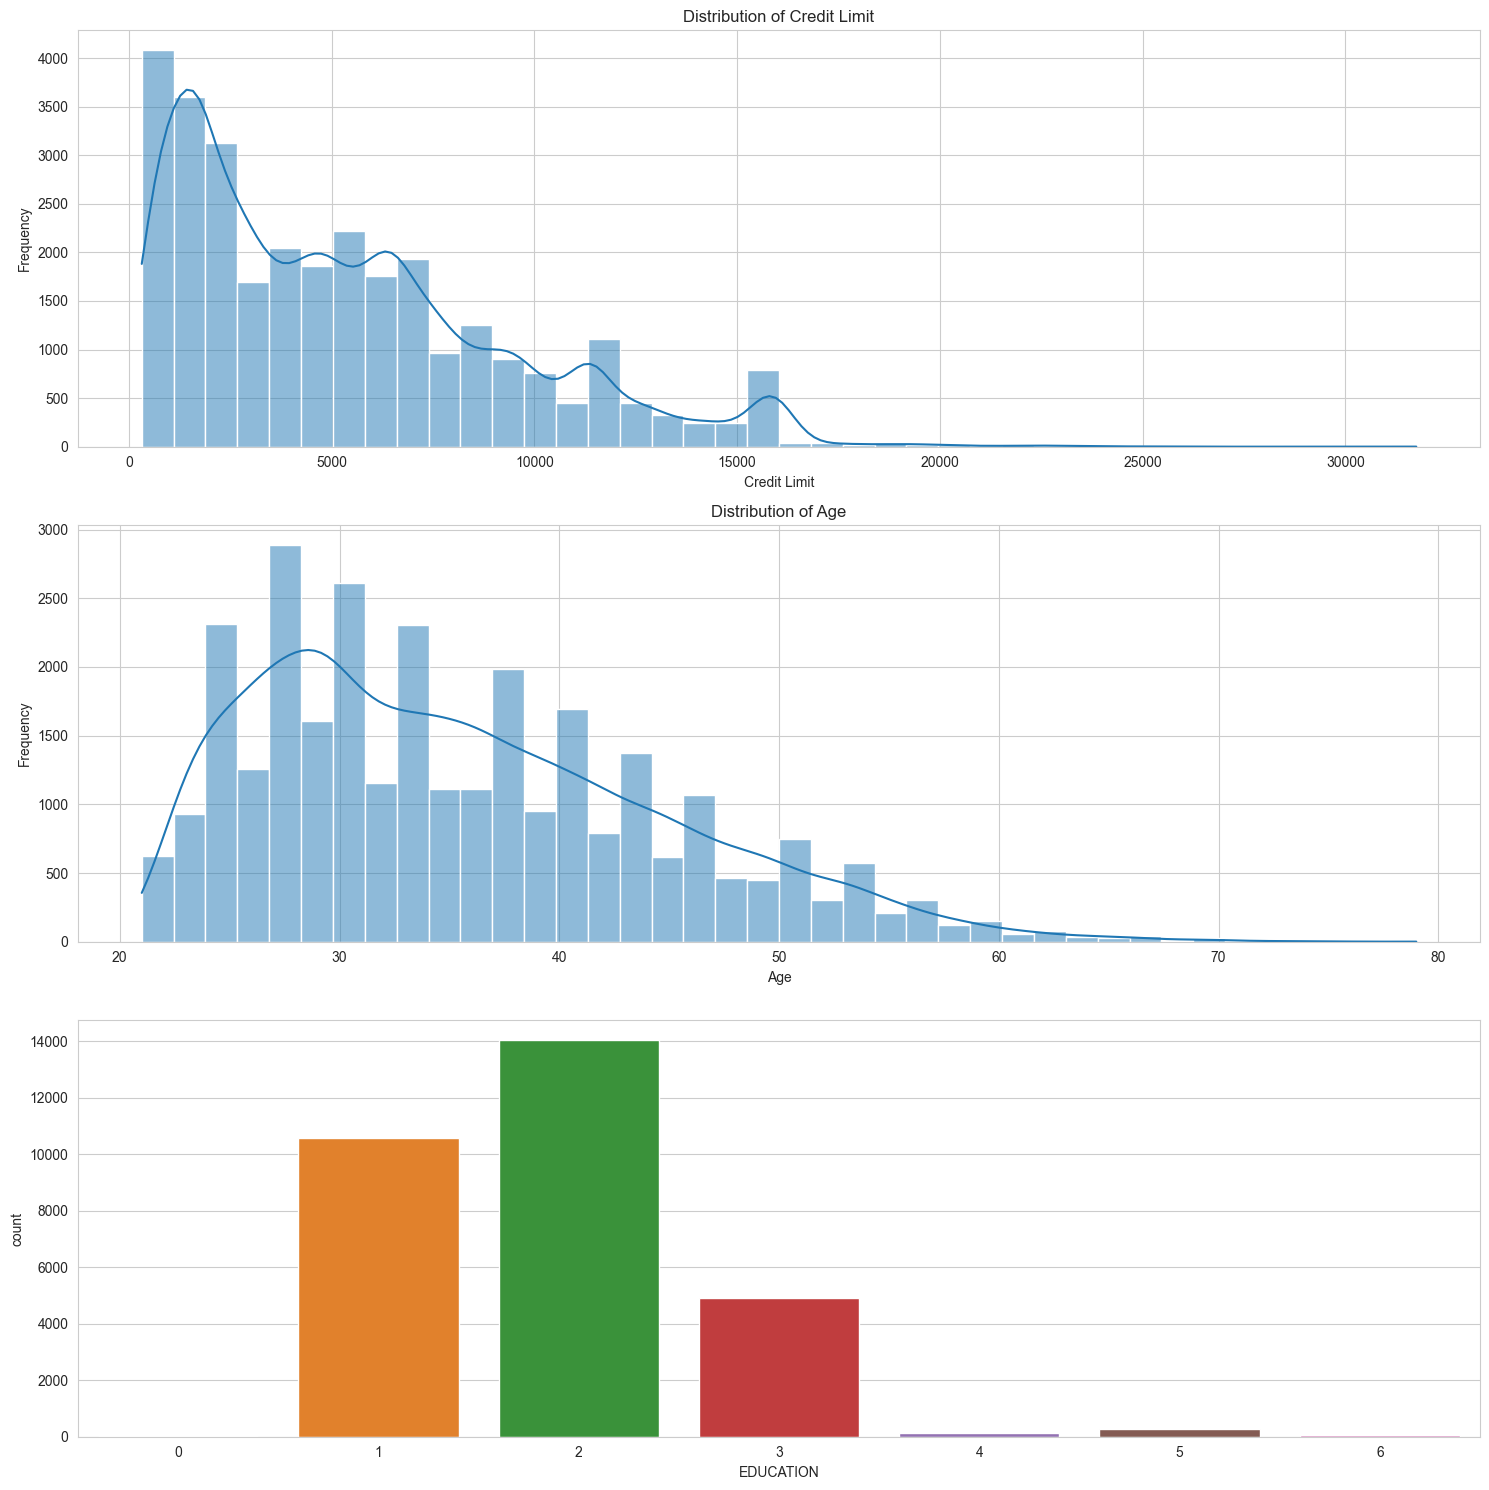

In [11]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# distribution of LIMIT_BAL
sns.histplot(df_usd['LIMIT_BAL'], ax=axes[0], bins=40, kde=True)
axes[0].set_title('Distribution of Credit Limit')
axes[0].set_xlabel('Credit Limit')
axes[0].set_ylabel('Frequency')

# distribution of Age
sns.histplot(df_usd['AGE'], ax=axes[1], bins=40, kde=True)
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Edu Counterplot
sns.countplot(x=df_usd["EDUCATION"])

# Adjust the layout
plt.tight_layout()
plt.show()


In [9]:
#pip install seaborn

In [27]:
df_usd[df_usd['EDUCATION'] == 5]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
47        48    4761.90    2          5         2   46      0      0     -1   
69        70     634.92    1          5         2   22      2      0      0   
385      386   13015.87    2          5         1   42      0      0      0   
1265    1266    2539.68    2          5         2   27      0      0      0   
1282    1283    4444.44    2          5         2   36      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29610  29611    6984.13    1          5         1   37     -2     -2     -1   
29811  29812    1587.30    1          5         2   46      0      0      0   
29839  29840    4761.90    1          5         1   36      0      0      0   
29920  29921    1587.30    1          5         1   45      2      0      0   
29966  29967    4761.90    1          5         2   31      2      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
47         0      0     -2     141.68      96.32      37.14      37.14   
69         0      0      0     589.37     546.16     548.73     574.13   
385        0      0      0   10733.52   10885.84   10935.37    7646.51   
1265       0      0      0    1437.08    1496.51    1505.11    1537.87   
1282       0      0      0    2896.06    2655.56    2540.86    1684.29   
...      ...    ...    ...        ...        ...        ...        ...   
29610     -1     -1      0    1404.86      62.41     196.48      58.73   
29811     -1      0      0    1566.22    1575.33     631.75     608.98   
29839      0      0      0    6872.44    7012.35    4241.78    4329.46   
29920      0      0      0    2283.40    2333.78    2392.79    1617.37   
29966      0     -2     -2    4281.46    4339.43    2914.76       0.00   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
47          0.00       0.00     32.16     37.14      0.00      0.00      0.00   
69        355.71     189.90      0.00     38.10     31.75     15.87     31.75   
385      7458.38    7624.63    476.19    444.44    285.71    269.84    285.71   
1265     1570.73    1373.46     82.54     57.14     53.97     53.97     53.97   
1282     3256.73    3119.08    132.76    126.98    126.98   3111.11    126.98   
...          ...        ...       ...       ...       ...       ...       ...   
29610     220.25     159.81     62.41    196.92     58.73    220.25      3.21   
29811     621.05     608.16     45.17     31.75    608.98     21.81     22.10   
29839    4419.65    4513.40    174.60    120.63    123.81    126.98    130.16   
29920    1619.68       0.00     95.24    108.83     63.56     32.48      0.00   
29966       0.00       0.00    147.08     63.49      0.00      0.00      0.00   

       PAY_AMT6  default payment next month  
47         0.00                           1  
69         0.00                           0  
385      263.49                           0  
1265      41.27                           0  
1282     111.11                           0  
...         ...                         ...  
29610     93.08                           0  
29811     24.63                           0  
29839    130.16                           0  
29920      0.00                           1  
29966      0.00                           1  

[280 rows x 25 columns]

In [23]:
df_usd['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [28]:
df_usd['MARRIAGE'].unique()

# 0 is others (3) ???
df_usd[df_usd['MARRIAGE'] == 0]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
218      219    3492.06    2          3         0   31      0      0      0   
809      810    5079.37    2          2         0   37      0      0      0   
820      821    6349.21    2          3         0   51     -1     -1     -1   
1019    1020    5714.29    2          3         0   45     -1     -1     -2   
1443    1444    6349.21    1          3         0   51     -1     -1     -1   
2146    2147    4761.90    2          3         0   55     -1     -1     -1   
2554    2555    6984.13    2          1         0   33     -1     -1     -1   
3056    3057    6349.21    1          3         0   36     -2     -2     -2   
4470    4471    2222.22    1          3         0   35      2      2      2   
5005    5006    2857.14    2          3         0   24     -2     -2     -2   
5345    5346    1587.30    2          2         0   28      1      2      0   
6389    6390     317.46    1          3         0   40      0      0      0   
7940    7941    1587.30    1          3         0   50      0      0      0   
7955    7956    1587.30    2          3         0   27      2      0     -1   
8886    8887    2222.22    1          3         0   26      1      2      2   
9088    9089    1587.30    1          3         0   50      0      0      0   
9973    9974    2539.68    2          3         0   34      0      0      0   
10208  10209    1587.30    2          1         0   45     -1     -1     -2   
11752  11753    9206.35    2          2         0   49      0      0      0   
11925  11926    4444.44    1          3         0   47      0      0      0   
12050  12051    2539.68    2          3         0   37     -2     -2     -2   
12078  12079     952.38    2          3         0   46      1      2      2   
12732  12733    2222.22    2          3         0   34      1      2      2   
13825  13826    3809.52    2          3         0   41      0      0     -2   
16581  16582     634.92    1          3         0   29      5      4      3   
17285  17286    3809.52    2          3         0   47     -1      0      0   
17529  17530    2539.68    2          3         0   41      0      0      0   
17576  17577    3492.06    2          3         0   31      0      0      0   
18306  18307    7301.59    2          3         0   30     -1     -1     -1   
18535  18536    7936.51    2          3         0   26      0      0      0   
18948  18949    1587.30    2          3         0   32     -1     -1      2   
19342  19343    6349.21    2          3         0   31      1     -2     -2   
19386  19387     952.38    2          3         0   30      0      0      2   
20119  20120    6349.21    2          3         0   45      0      0      0   
20449  20450    3809.52    1          3         0   26      0      0     -1   
21559  21560     634.92    2          3         0   23      0      0      0   
22590  22591    5079.37    2          2         0   41      0      0      0   
23029  23030    2539.68    2          3         0   37     -2     -2     -2   
23103  23104    2857.14    2          3         0   42      0      0      2   
23135  23136     634.92    2          3         0   35      0     -1      2   
23360  23361    7619.05    2          3         0   37     -1     -1     -1   
24216  24217    5714.29    1          3         0   27     -2     -2     -2   
24443  24444    9523.81    1          1         0   37     -1     -1     -1   
24721  24722   11428.57    1          2         0   38     -1     -1     -1   
24984  24985    1587.30    1          3         0   39      0      0      0   
25308  25309    5396.83    2          2         0   24     -1      0      0   
25702  25703    6349.21    2          3         0   45     -2     -2     -2   
26250  26251    6666.67    2          1         0   31     -1     -1     -1   
28457  28458    5714.29    2          3         0   36     -1     -1     -1   
28602  28603    6349.21    2          3         0   37      